In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Contour FI Plot

This notebook is to create a sandbox where I can develop the code that will take a range of $I_{in}$ and $I_{lk}$ values and will convert them to equivalent $\tau$ and $i_{in}$ values to plot the region of the FI curve (using dimensionless input) that is equivalent.  In other words, this plot will allow me to see how dimensional ranges equate to dimensionless ranges.  It should be noted that this conversion will assume we already have a known $\rho_{qua}$, $\rho_{tau}$, $\rho_{ilkr}$, $\rho_{ref1}$, and $\rho_{ref2}$ values.  It should also be noted that this will assume that we are only plotting one $t_{ref}$ value worth of data, because any more and we would need a 3-D plot.

The final usage of this sandbox will be to determine how much coverage my calibration script has compared to my validation script.

## Define common functions

In [2]:
def hFunc(iIn):
    foo = sqrt(2*array(iIn) - 1.)
    return (pi + 2*arctan(1./foo)) / foo

def tautoIlk(tau, ptau, pilkr):
    return (ptau/tau) - pilkr

def iIntoIin(iIn, Ilk, pqua, pilkr):
    return (array(iIn)*((Ilk+pilkr)**2))/(pqua*Ilk)

def trtoIref(tr, Iin, Ilk, pref1, pref2, Cmin, Cmax):
    tmpIref = (pref1 - pref2*log(Iin*Ilk))/tr
    tmpIref = array(tmpIref)
    tmpIref[tmpIref<=Cmin] = Cmin
    tmpIref[tmpIref>=Cmax] = Cmax
    return tmpIref

def tauFunc(Ilk, ptau, pilkr):
    return ptau/(Ilk+pilkr)

def iInFunc(Iin, Ilk, pqua, pilkr):
    return  (pqua*Iin*Ilk)/(Ilk+pilkr)**2

def trFunc(Iin, Ilk, Iref, pref1, pref2):
    return (pref1 - pref2*log(array(Iin)*Ilk))/Iref

def ftoTau(f, iIn, tref):
    return ((1/f)-tref)/hFunc(iIn)

def fDim(Iin, Ilk, Iref, pqua, ptau, pilkr, pref1, pref2):
    return

## Set/Create data

In [9]:
pqua = 0.749205
ptau = 0.00103391
pilkr = 0.0057549
pref1 = 0.0439289
pref2 = -0.000971637
tref = 3e-3

(0.0, 12.0)

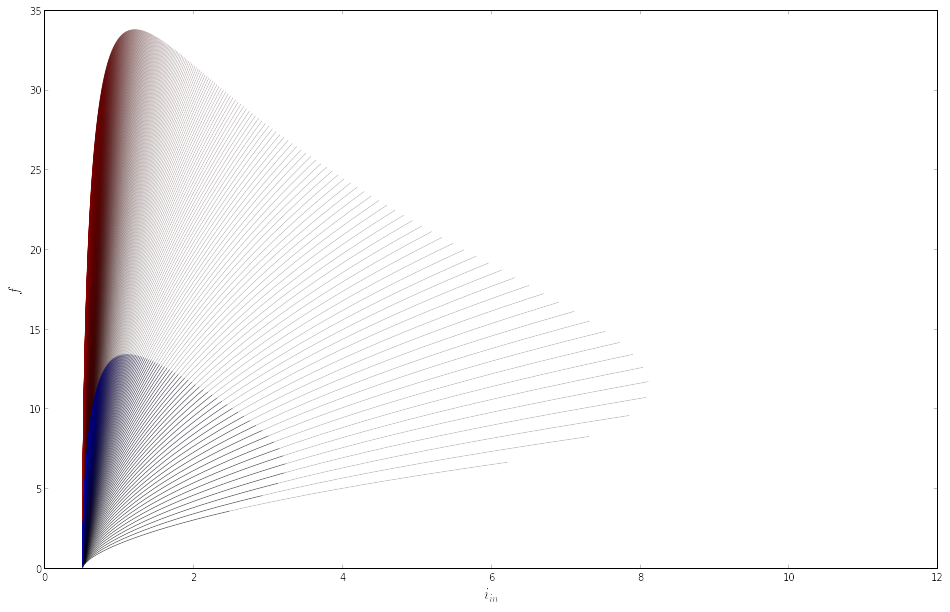

In [10]:
IinMin, IinMax = 0.001, 0.1
IlkMin, IlkMax = 0.002, 0.2
figure(figsize=(16,10))
Iins = arange(0.001, 0.25, 0.001)
Ilks = arange(0.002, 0.6, 0.001)
for i, Ilk in enumerate(Ilks):
    curTau = tauFunc(Ilk, ptau, pilkr)
#     print 'Tau:\t', curTau
    curiIns = iInFunc(Iins, Ilk, pqua, pilkr)
    curIins = Iins
#     print 'iIns:\t', curiIns
    validiIns = curiIns > 0.5
#     print validiIns
    # Filter out bad iIn Values
    curiIns = curiIns[validiIns]
    curIins = curIins[validiIns]
#     print '=============Filtered iIns===========\n', curiIns
#     print '=============Filtered Iins (filter by valid iIns)===========\n', curIins
    
    curIrefs = (pref1 - (pref2*log(curIins*Ilk)))/tref
#     print '=============Filtered Irefs (filter by valid iIns)===========\n', curIrefs

    Fs = 1/(curTau*hFunc(curiIns)+trFunc(curIins, Ilk, curIrefs, pref1, pref2))
#     print Fs

    curRed = i*1./len(Ilks)
    plot(curiIns, Fs, '-', color=(curRed, 0, 0, 1), alpha=0.5)

Iins = arange(0.001, 0.1, 0.001)
Ilks = arange(0.002, 0.2, 0.001)
for i, Ilk in enumerate(Ilks):
    curTau = tauFunc(Ilk, ptau, pilkr)
#     print 'Tau:\t', curTau
    curiIns = iInFunc(Iins, Ilk, pqua, pilkr)
    curIins = Iins
#     print 'iIns:\t', curiIns
    validiIns = curiIns > 0.5
#     print validiIns
    # Filter out bad iIn Values
    curiIns = curiIns[validiIns]
    curIins = curIins[validiIns]
#     print '=============Filtered iIns===========\n', curiIns
#     print '=============Filtered Iins (filter by valid iIns)===========\n', curIins
    
    curIrefs = (pref1 - (pref2*log(curIins*Ilk)))/tref
#     print '=============Filtered Irefs (filter by valid iIns)===========\n', curIrefs

    Fs = 1/(curTau*hFunc(curiIns)+trFunc(curIins, Ilk, curIrefs, pref1, pref2))
#     print Fs

    curBlue = i*1./len(Ilks)
    plot(curiIns, Fs, '-', color=(0, 0, curBlue, 1), alpha=0.5)
xlabel(r'$i_{in}$', fontsize=15)
ylabel(r'$f$', fontsize=15)
xlim([0.,12.0])

In [63]:
from IPython.html.widgets import interactive
from IPython.display import display

def plotCalibRegion(IinMin=0.001, IinMax=0.1, IlkMin=0.002, IlkMax=0.2):
    figure(figsize=(16,10))
    
    # Plot the variable model
    Iins = arange(IinMin, IinMax, 0.001)
    Ilks = arange(IlkMin, IlkMax, 0.0005)
    IinMesh, IlkMesh = meshgrid(Iins,Ilks)

    taus = tauFunc(IlkMesh, ptau, pilkr)
    iIns = iInFunc(IinMesh, IlkMesh, pqua, pilkr)
    # IrefMesh = (pref1 - (pref2*log(IinMesh*IlkMesh)))/tref
    # Fs = 1/(taus*hFunc(iIns)+trFunc(IinMesh, IlkMesh, IrefMesh, pref1, pref2))
    Fs = 1/(taus*hFunc(iIns)+tref)
    plot(iIns, Fs, 'r-', alpha=.7)
    
    xlabel(r'$i_{in}$', fontsize=15)
    ylabel(r'$f$', fontsize=15)
    xlim([0,max([max(curiIn) for curiIn in iIns])+0.1])
    
    # Plot the default model used during calibration currently
    Iins = arange(0.001, 0.1, 0.001)
    Ilks = arange(0.002, 0.2, 0.0005)
    IinMesh, IlkMesh = meshgrid(Iins,Ilks)

    taus = tauFunc(IlkMesh, ptau, pilkr)
    iIns = iInFunc(IinMesh, IlkMesh, pqua, pilkr)
    # IrefMesh = (pref1 - (pref2*log(IinMesh*IlkMesh)))/tref
    # Fs = 1/(taus*hFunc(iIns)+trFunc(IinMesh, IlkMesh, IrefMesh, pref1, pref2))
    Fs = 1/(taus*hFunc(iIns)+tref)
    plot(iIns, Fs, 'b-', alpha=.3)   

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from IPython.kernel.zmq import kernelapp as app


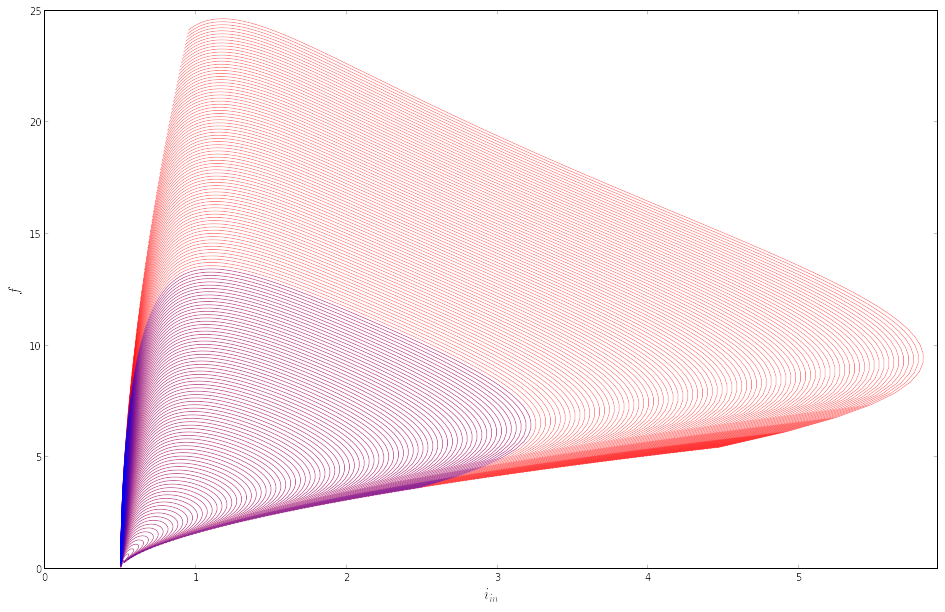

In [64]:
interactive(plotCalibRegion, 
            IinMin=(0.0001,0.05,0.0001), IinMax=(0.05, 0.5, 0.01), 
            IlkMin=(0.0001, 0.05, 0.0001), IlkMax=(0.05, 1, 0.01))

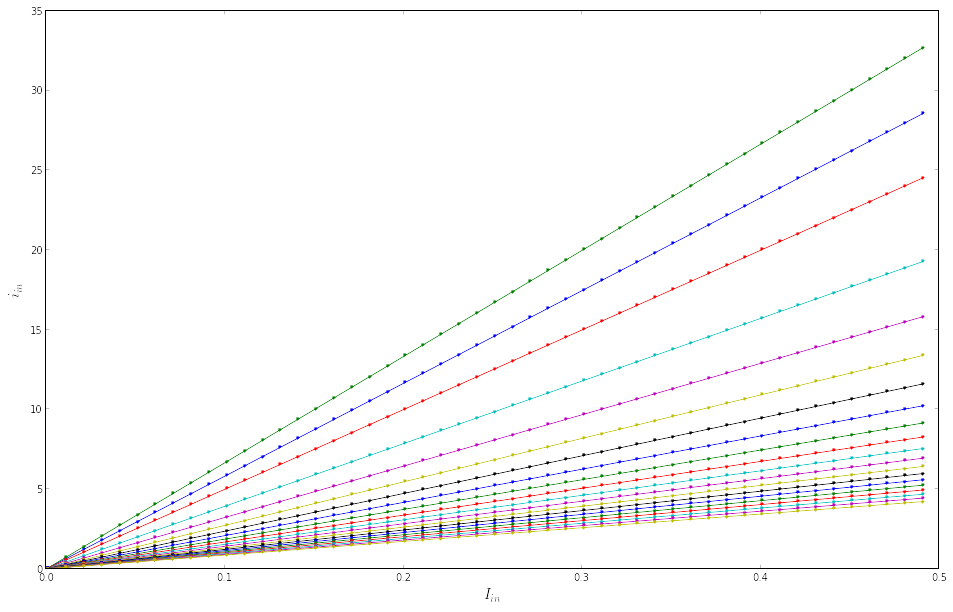

In [6]:
Iins = arange(0.001, 0.5, 0.01)
Ilks = arange(0.002, 0.2, 0.01)
IinMesh, IlkMesh = meshgrid(Iins,Ilks)
iIns = iInFunc(IinMesh, IlkMesh, pqua, pilkr)

figure(figsize=(16,10))
for i, Ilk in enumerate(Ilks):
    plot(Iins,iIns[i],'.-')
xlabel(r'$I_{in}$', fontsize=15)
ylabel(r'$i_{in}$', fontsize=15)

##Appendix

In [7]:
testVec1 = arange(1, 6, 1)
testVec2 = arange(1, 4, 1)
# print testVec1, testVec2

a, b  = meshgrid(testVec1, testVec2)
print 'a:\t', a, '\nb:\t', b

print a*b*2.
print (b+1.)**2
print a*b*2. / (b + 1)**2
print iInFunc(a, b, 2., 1)

a:	[[1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]] 
b:	[[1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]
[[  2.   4.   6.   8.  10.]
 [  4.   8.  12.  16.  20.]
 [  6.  12.  18.  24.  30.]]
[[  4.   4.   4.   4.   4.]
 [  9.   9.   9.   9.   9.]
 [ 16.  16.  16.  16.  16.]]
[[ 0.5         1.          1.5         2.          2.5       ]
 [ 0.44444444  0.88888889  1.33333333  1.77777778  2.22222222]
 [ 0.375       0.75        1.125       1.5         1.875     ]]
[[ 0.5         1.          1.5         2.          2.5       ]
 [ 0.44444444  0.88888889  1.33333333  1.77777778  2.22222222]
 [ 0.375       0.75        1.125       1.5         1.875     ]]
